# Classification with Logistic Regression

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd
import matplotlib.pyplot as plt

# Data Visualization
import seaborn as sns

# SHAP
import shap

# Tabulate
from tabulate import tabulate

# Scikit-Learn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### The Adult Dataset

#### Retreiving & Loading Data

In [2]:
X, y = shap.datasets.adult()

In [3]:
# Splitting Procedure
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size = 0.2,
    random_state=1
)

#### Categorical & Numerical Features

In [4]:
cats = ['Workclass', 'Marital Status', 'Occupation',
        'Relationship', 'Race', 'Sex', 'Country']

In [5]:
nums = ['Age', 'Education-Num', 'Capital Gain',
        'Capital Loss', 'Hours per week']

#### Placing Column Transformer

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cats),
        ('num', StandardScaler(), nums)
    ])

#### Defining Model

In [8]:
# Placing Model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

In [9]:
# Fitting Model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Workclass',
                                                   'Marital Status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Education-Num',
                                                   'Capital Gain',
                                                   'Capital Loss',
                                                   'Hours per week'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [10]:
X_sub = shap.sample(X_train, 100)

In [11]:
ex = shap.Explainer(model.predict_proba, X_sub)

In [12]:
shap_values = ex(X_test.iloc[0:100])

In [13]:
class_index = 1

data_index = 1

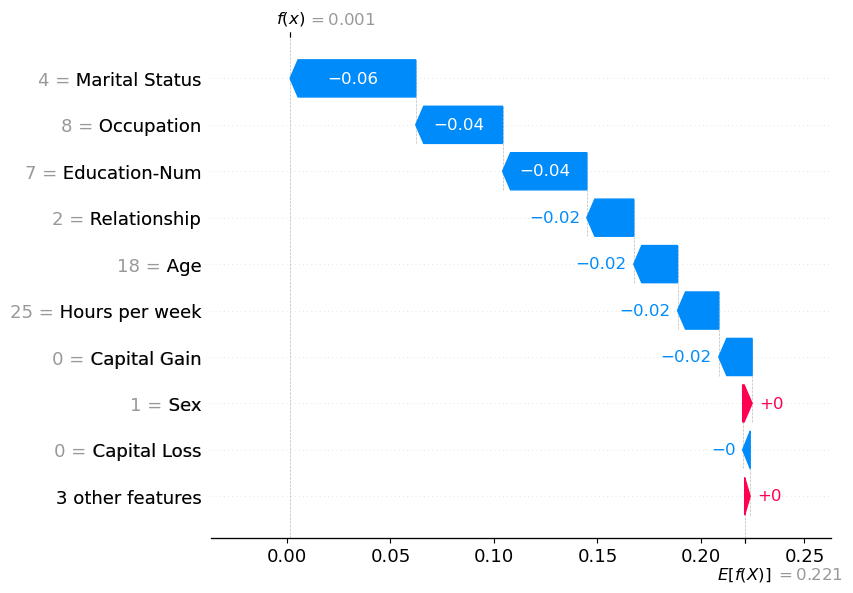

In [14]:
shap.plots.waterfall(shap_values[data_index, :, class_index])

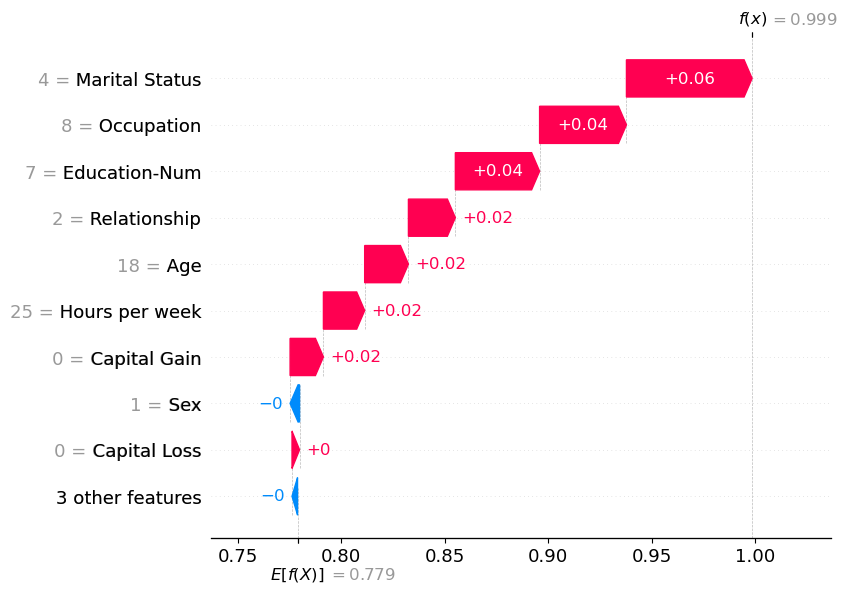

In [15]:
# Inspecting on Alternative class, as follows:
class_index = 0

shap.plots.waterfall(shap_values[data_index, :, class_index])

### Alternative Based on Bar Plotting

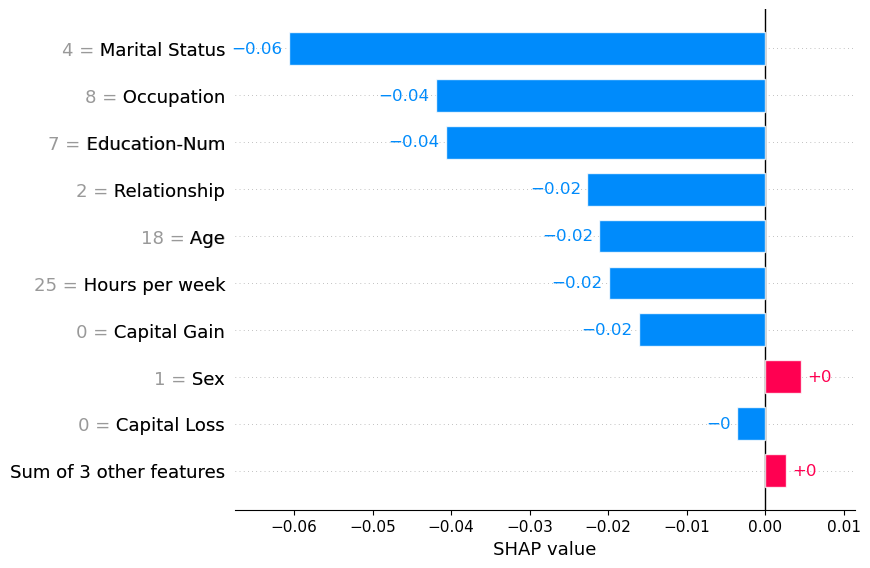

In [16]:
# 1st Class Resetting
class_index = 1

shap.plots.bar(shap_values[data_index, :, class_index])

#### Force Plotting Approach

In [18]:
shap.initjs()

shap.plots.force(shap_values[data_index, :, class_index])

### `Log-Odds` Interpretation

In [19]:
ex_logit = shap.Explainer(
    model.predict_proba, X_sub, link=shap.links.logit
)

In [20]:
sv_logit = ex_logit(X_test.iloc[0:100])

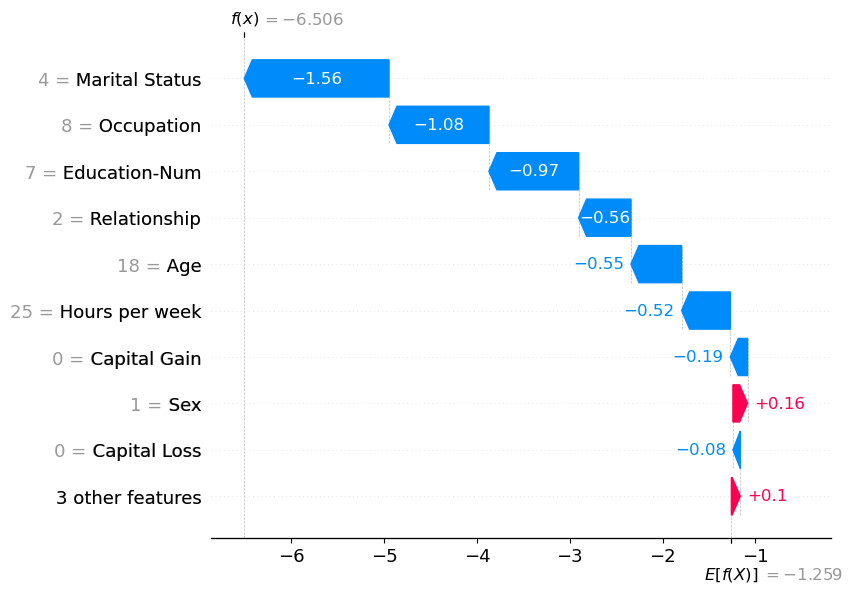

In [21]:
shap.plots.waterfall(sv_logit[data_index, :, class_index])

### Understanding The Data Globally

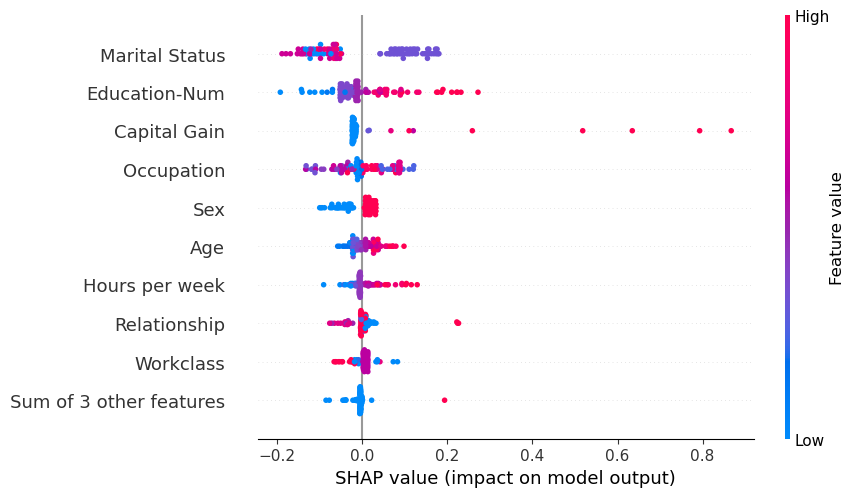

In [22]:
shap.plots.beeswarm(shap_values[:, :, class_index])

### Clustering SHAP Values

In [24]:
# Comprising Force Plot by Similarity, as follows
shap.plots.force(sv_logit[0:20: ,:, 0])

In [26]:
# Comprising Force Plot by Marital Status, as follows
shap.plots.force(sv_logit[0:20: ,:, 0])

### The Heatmap Plotting

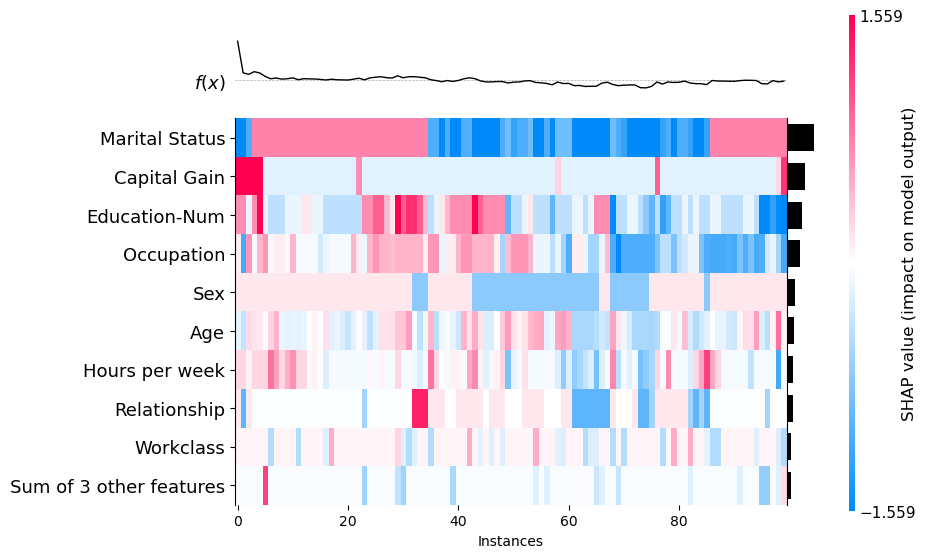

In [28]:
shap.plots.heatmap(sv_logit[:, :, class_index])
plt.show()